In [65]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata_df = pd.read_csv(city_data_to_load)
ridedata_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ridedata_df, citydata_df, on="city", how="right")

combined_df_up = pd.merge(ridedata_df, citydata_df, on="city", how="left")

combined_df_up.head()

#combined_df_up.to_csv("out.csv", sep='\t', encoding='utf-8')


# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

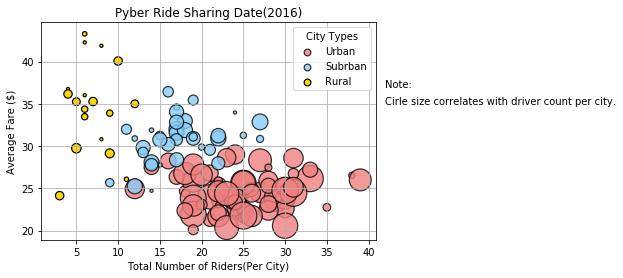

In [66]:
# Create a dataframe that is groupped by city

grouped_combined_df = combined_df.groupby(["city"])


#find out average fair per city

grouped_combined_df_fair =   grouped_combined_df['fare'].mean()

# Calucluate Total Number of Rides Per City

grouped_combined_df_ridecount = grouped_combined_df['ride_id'].count()

# Calculate total number of drivers per city

grouped_combined_df_drivercount = grouped_combined_df['driver_count'].mean()

# Calculate City Type (Urban, Suburban, Rural)

grouped_combined_df_citytype = grouped_combined_df['type'].first()

# create a dataframe with all above 

grouped_df= pd.DataFrame({"average fare": grouped_combined_df_fair, "total rider":grouped_combined_df_ridecount,
                  
                  "total driver":grouped_combined_df_drivercount,"type" :grouped_combined_df_citytype })

# Obtain the x and y coordinates for each of the three city types

grouped_df=grouped_df.reset_index()

grouped_df_urban = grouped_df.loc[grouped_df["type"] == "Urban",:]

grouped_df_rural = grouped_df.loc[grouped_df["type"] == "Rural",:]

grouped_df_suburban=grouped_df.loc[grouped_df["type"] == "Suburban",:]

grouped_df_suburban.head()




# Build the scatter plots for each city types

ax = grouped_df_urban.plot(kind = "scatter", x = "total rider", y ="average fare", c ='lightcoral',s = grouped_df_urban["total driver"]*10 , 
                   grid = True, label = "Urban",edgecolors="black",alpha =.8,linewidths =1.2)
ax1 = grouped_df_suburban.plot(kind = "scatter", x = "total rider", y ="average fare", c ='lightskyblue',alpha=.8,edgecolors="black",linewidths =1.2,

                               s = grouped_df_suburban["total driver"]*10  , grid = True, title = "Pyber Ride Sharing Date(2016)",label = "Subrban", ax=ax)

ax2= grouped_df_rural .plot(kind = "scatter", x = "total rider", y ="average fare", c ='Gold',edgecolors="black",linewidths =1.2,
                     s = grouped_df_rural ["total driver"]*10  , grid = True, label ='Rural',ax=ax)


# Incorporate the other graph properties

ax.set_xlabel("Total Number of Riders(Per City)")

ax.set_ylabel("Average Fare ($)")

# Create a legend

legend = plt.legend(title = "City Types")
for handles in legend.legendHandles:
    handles.set_sizes([45])
    
    



# Incorporate a text label regarding circle size

ax.text(42,37,"Note:")
ax.text(42,35,"Cirle size correlates with driver count per city.")

# Save Figure


plt.savefig("Pyber Ride sharing Bubble Plot.png")



In [67]:
# Show plot
plt.show()

## Total Fares by City Type

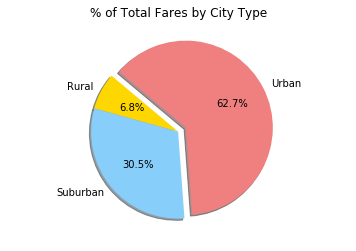

In [68]:
# Calculate % of Total Fares by City Typ

grouped_combined_fare_chart_df = combined_df.groupby(["type"])

fare_by_city_type = grouped_combined_fare_chart_df['fare'].sum()

total_ride_city_type = grouped_combined_fare_chart_df['ride_id'].count()

grouped_fare_df= pd.DataFrame({"Total fare": fare_by_city_type})

type = ["Rural", "Suburban", "Urban"]

colors = [ "Gold", "lightskyblue","lightcoral"]

explode = (0,0,0.1)

plt.axis("equal")

# Build Pie Chart

plt.pie(grouped_fare_df["Total fare"], explode=explode, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

# Save Figure


plt.savefig("% of Total Fares by City Type.png")

In [69]:
# Show Figure
plt.show()

## Total Rides by City Type

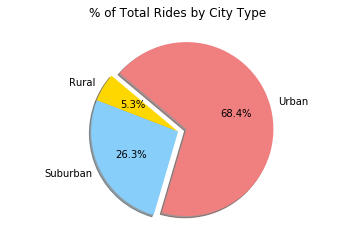

In [70]:
# Calculate Ride Percents

grouped_fare_df= pd.DataFrame({"Total Ride": total_ride_city_type})

grouped_fare_df.head()

# Build Pie Chart

plt.axis("equal")

plt.pie(grouped_fare_df["Total Ride"], explode=explode, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

plt.savefig("% of Total Rides by City.png")

# Save Figure


In [71]:
# Show Figure
plt.show()

## Total Drivers by City Type

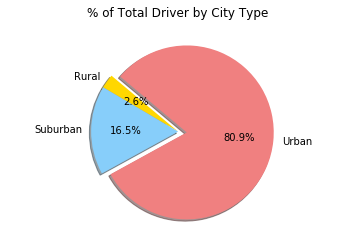

In [72]:
# Calculate Driver Percents



grouped_combined_driver_df = citydata_df.groupby(["type"])


driver_count_city_type = grouped_combined_driver_df['driver_count'].sum()


grouped_driver_df= pd.DataFrame({"Total Driver": driver_count_city_type})


grouped_driver_df.head()



plt.axis("equal")

plt.pie(grouped_driver_df["Total Driver"], explode=explode, labels=type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Driver by City Type")

plt.savefig("% of Total Driver by City Type.png")


# Build Pie Charts

# Save Figure


In [73]:
# Show Figure
plt.show()